In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import xml.etree.ElementTree as ET
from collections import defaultdict
import sys 
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")
import re 
sys.path.append('/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/analysis')
from transcriptomics import *
from hcr import *
from primers import * 
from plotting import * 
#tr = load_transcriptome_object("/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/Analysis/biroi_transcriptome.pkl")
black_plotting()

Initializing transcriptomics package
Initializing HCR package
Initializing custom primer package
Initializing plotting package


In [3]:
main_dir = '/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/cell counting'

In [4]:
def count_markers_in_xml(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Dictionary to store the count of markers for each marker type
    marker_counts = defaultdict(int)

    # Locate Marker_Type elements
    marker_data = root.find("Marker_Data")
    if marker_data is not None:
        for marker_type in marker_data.findall("Marker_Type"):
            # Extract the name of the marker type
            type_name = marker_type.find("Name").text
            # Check that the marker name doesn't contain the keyword "Type" 
            if "Type" in type_name: 
                continue
            # Count the number of Marker elements within the Marker_Type
            markers = marker_type.findall("Marker")
            marker_counts[type_name] += len(markers)

    return dict(marker_counts)

## Q1 & R2, P14
Counters
1. 647C-546A (cytoplasmic R2, absent Q1)
2. 647N-546C (nuclear R2, cytoplasmic Q1)

In [5]:
input_path = os.path.join(main_dir, '2024-10-18', 'B Or5-R2-R3-B3-647 Or5-Q1-B1-594 DAPI P14 Antennae') 

# Load XML cell counting files 
xml_files = [f for f in os.listdir(input_path) if f.endswith('.xml')]

# load data 
data = []
for file in xml_files:
    file_path = os.path.join(input_path, file)
    marker_counts = count_markers_in_xml(file_path)
    data.append(marker_counts)

# Create a DataFrame from the data
data = pd.DataFrame(data)

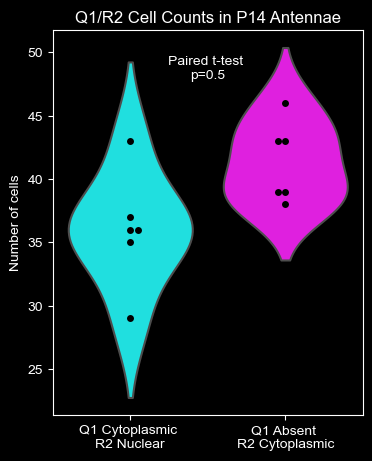

In [6]:
# Plot the data using seaborn as violin with swarmplot
f, ax = plt.subplots(1, 1, figsize=(4, 5))
colors = ['cyan', 'magenta']
# Violin plot with large white points inside
sns.violinplot(data=data, inner=None, ax=ax, linewidth=1.5, palette=colors) 
sns.swarmplot(data=data, ax=ax, color='black', size=5) 
plt.xticks([0, 1], ["Q1 Cytoplasmic \nR2 Nuclear", "Q1 Absent \nR2 Cytoplasmic"])
t, p = stats.ttest_rel(data.iloc[0,:], data.iloc[1,:])
ax.text(0.5, 0.9, f"Paired t-test \np={p:.2}", ha='center', va='center', transform=ax.transAxes)
plt.ylabel("Number of cells")
plt.title("Q1/R2 Cell Counts in P14 Antennae")
plt.show()

In [7]:
# paired t-test 
stats.ttest_rel(data.iloc[0,:], data.iloc[1,:])

TtestResult(statistic=-1.0, pvalue=0.49999999999999956, df=1)

## Q1 & R2, 4mo
Counters
1. 647C-546A (cytoplasmic R2, absent Q1)
2. 647N-546C (nuclear R2, cytoplasmic Q1)

In [8]:
input_path = os.path.join(main_dir, '2024-10-24', 'C 4mo Antennae R2-R3-B3-647 Q1-B1-594 DAPI') 

# Load XML cell counting files 
xml_files = [f for f in os.listdir(input_path) if f.endswith('.xml')]

# load data 
data = []
for file in xml_files:
    file_path = os.path.join(input_path, file)
    marker_counts = count_markers_in_xml(file_path)
    data.append(marker_counts)

# Create a DataFrame from the data
data = pd.DataFrame(data)

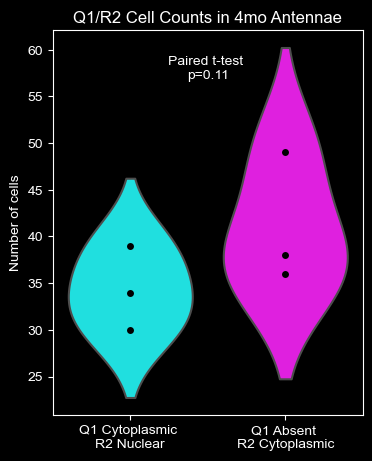

In [9]:
# Plot the data using seaborn as violin with swarmplot
f, ax = plt.subplots(1, 1, figsize=(4, 5))
colors = ['cyan', 'magenta']
# Violin plot with large white points inside
sns.violinplot(data=data, inner=None, ax=ax, linewidth=1.5, palette=colors) 
sns.swarmplot(data=data, ax=ax, color='black', size=5) 
plt.xticks([0, 1], ["Q1 Cytoplasmic \nR2 Nuclear", "Q1 Absent \nR2 Cytoplasmic"])
t, p = stats.ttest_rel(data.iloc[0,:], data.iloc[1,:])
ax.text(0.5, 0.9, f"Paired t-test \np={p:.2}", ha='center', va='center', transform=ax.transAxes)
plt.ylabel("Number of cells")
plt.title("Q1/R2 Cell Counts in 4mo Antennae")
plt.show()

## T79 Exonic/Intergenic

In [19]:
input_path = os.path.join(main_dir, '2024-11-08', 'G P14 Antennae T79-intergenic-b2-647 T79-exonic-b2-594 DAPI') 

# Load XML cell counting files 
xml_files = [f for f in os.listdir(input_path) if f.endswith('.xml')]

# load data 
data = []
for file in xml_files:
    file_path = os.path.join(input_path, file)
    marker_counts = count_markers_in_xml(file_path)
    data.append(marker_counts)

# Create a DataFrame from the data
data = pd.DataFrame(data)

data

,647P-594P,647A-594P
0,288,1
1,307,2
2,308,2
3,282,3
4,302,6


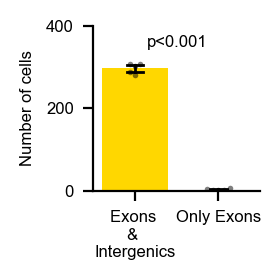

In [24]:
# Plot bar plot and do paired t-test
white_plotting()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
f, ax = plt.subplots(1, 1, figsize=(1.5, 1.5), dpi=200)
sns.barplot(data=data, palette=['gold', 'darkblue'], errwidth=1, alpha=1, saturation=1, capsize=0.2, errcolor='black')
sns.swarmplot(data=data, color='black', alpha=0.5, s=2)
plt.ylabel("Number of cells", fontsize=6)
plt.yticks(fontsize=6)
plt.xticks([0, 1], ["Exons \n& \nIntergenics", "Only Exons"], fontsize=6)
#plt.title(f"T79 Cell Counts \nP14 Antenna (n={data.shape[0]})", fontsize=6)
plt.ylim(0, 400)
t, p = stats.ttest_rel(data.iloc[:,0], data.iloc[:,1])
p_value_str = f"p={p:.3f}" if p >= 0.001 else "p<0.001"
plt.text(0.5, 0.9, p_value_str, ha='center', va='center', transform=ax.transAxes, fontsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(f"/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/lncRNA Paper/figure_pdfs/t79-cell-counts.pdf", format="pdf", pad_inches=0, bbox_inches=0, transparent=False)
plt.show()

In [11]:
# mean of the sum of both columns 
data.sum(axis=1)

0    289
1    309
2    310
3    285
4    308
dtype: int64

In [12]:
np.std(data.iloc[:,0])

10.49952379872535

In [13]:
print(f"range: {np.min(data.iloc[:,0])} - {np.max(data.iloc[:,0])}")

range: 282 - 308


In [14]:
data['proportion'] = data.iloc[:,0] / data.sum(axis=1)
data['proportion'].mean()

0.9907217704609879

In [15]:
data.iloc[:,:2].values

array([[288,   1],
       [307,   2],
       [308,   2],
       [282,   3],
       [302,   6]])

In [16]:
np.sum(data.iloc[:,0]) / np.sum(data.iloc[:,:2].values)

0.9906728847435043

In [17]:
data.sum(axis=1) / (data.sum(axis=1).sum() / 2)

0    0.385133
1    0.411691
2    0.413019
3    0.379812
4    0.410345
dtype: float64

## Q1/R2

4 channels (DAPI, 488, 546, 647)
Display order: magenta, yellow, grey, cyan 
Channel order: Alexa546, Alexa488, DAPI, Alexa647 

2025-02-13
C p14 antenna R2-b3-488 Q1-b1-546 Lnc6-b2-647 DAPI

Q1-546-Magenta
R2-488-Yellow 
DAPI-Greys 
Lnc6-647-Cyan 

40x, 0.7x zoom, confocal (2771x2771): 1 pixel = 0.0823µm, so 1µm = 12.15 pixels 

### Quantification 
##### 546C-488N-647A 
- Q1 cytoplasmic, R2 nuclear, Ln6 absent 
- Magenta cytoplasmic, yellow nuclear, cyan absent 
##### 546A-488C-647N 
- R2 cytoplasmic, Lnc6 nuclear, Q1 absent 
- Yellow cytoplasmic, cyan nuclear, magenta absent 
##### 546A-488C-647A 
- R2 cytoplasmic, Lnc6 absent, Q1 absent 
- Yellow cytoplasmic, cyan absent, magenta absent 
##### 546N-488C-647A 
- R2 cytoplasmic, Lnc6 absent, Q1 nuclear 
- Yellow cytoplasmic, cyan absent, magenta nuclear 


In [18]:
input_dir = '/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/lncRNA Paper/FISH/2025-02-13/C p14 antenna R2-b3-488 Q1-b1-546 Lnc6-b2-647 DAPI/20250213 C quantification'

# Load XML cell counting files
xml_files = [f for f in os.listdir(input_dir) if f.endswith('.xml')]

# load data
data = []
for file in xml_files:
    file_path = os.path.join(input_dir, file)
    marker_counts = count_markers_in_xml(file_path)
    data.append(marker_counts)

# Create a DataFrame from the data
data = pd.DataFrame(data)
data

,546C-488N-647A,546A-488C-647N,546A-488C-647A,546N-488C-647A
0,42,24,8,1
1,39,20,9,0
2,40,21,14,0
3,42,18,14,0
4,36,20,16,0


In [26]:
print(f"Mean R2 cytoplasmic cells: {data.iloc[:,1:].sum(axis=1).mean()}")

Mean R2 cytoplasmic cells: 33.0


In [29]:
print(f"Mean R2 cytoplasmic cells with nuclear Lnc6: {data.iloc[:,1].mean()}")

Mean R2 cytoplasmic cells with nuclear Lnc6: 20.6


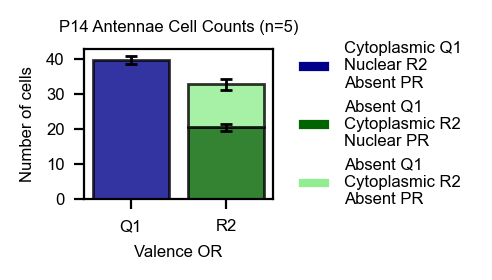

In [20]:
# Sample data: Replace with actual means and standard errors
means = data.iloc[:, 0:3].mean()  # Mean values for each group
std_errors = data.iloc[:, 0:3].std() / np.sqrt(data.shape[0])  # Standard Error (SE)

# Define bar positions
x = np.array([0, 1])  # First bar is separate, second and third are stacked

# Create a figure
f, axs = plt.subplots(1, 2, figsize=(2.5, 1.5), dpi=200, width_ratios=[3, 1])

labels = ["Cytoplasmic Q1 \nNuclear R2 \nAbsent PR", "Absent Q1 \nCytoplasmic R2 \nNuclear PR", "Absent Q1\nCytoplasmic R2 \nAbsent PR"] 
colors = ['darkblue', 'darkgreen', 'lightgreen']

ax = axs[0]
# Plot the first bar separately
ax.bar(x[0], means[0], color=colors[0], edgecolor='black', alpha=0.8, label=labels[0])
ax.errorbar(x[0], means[0], yerr=std_errors[0], fmt='none', capsize=2, color='black', lw=1)

# Stack the second and third bars
bottom_stack = means[1]  # Store bottom height for stacking
ax.bar(x[1], means[1], color=colors[1], edgecolor='black', alpha=0.8, label=labels[1])
ax.errorbar(x[1], means[1], yerr=std_errors[1], fmt='none', capsize=2, color='black', lw=1)  # Error for lower stack

ax.bar(x[1], means[2], color=colors[2], edgecolor='black', alpha=0.8, bottom=bottom_stack, label=labels[2])
ax.errorbar(x[1], means[1] + means[2], yerr=std_errors[2], fmt='none', capsize=2, color='black', lw=1)  # Error for top stack

# Customize labels
ax.set_xticks([0, 1], labels=[
    "Q1",
    "R2"
], fontsize=6)

ax.set_ylabel("Number of cells", fontsize=6)
ax.set_yticks([0, 10, 20, 30, 40], labels = [0, 10, 20, 30, 40], fontsize=6)
ax.set_title(f"P14 Antennae Cell Counts (n={data.shape[0]})", fontsize=6)
ax.set_xlabel("Valence OR", fontsize=6)

# Create an artificial legend in the second subplot 
ax = axs[1]
for i, color in enumerate(colors):
    ax.bar(0, 0, color=color, edgecolor='white', label=labels[i])
ax.legend(loc='center', fontsize=6, frameon=False)
ax.axis('off')

plt.tight_layout()
plt.savefig(f"/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/lncRNA Paper/figure_pdfs/Q1R2PR-cell-counts.pdf", format="pdf", pad_inches=0, bbox_inches=0, transparent=False)
plt.show()


## T19 U5, U34, U54, P14 Antennae

Counters
1. 546C-488N-647A (cyto magenta, nuclear yellow, no cyan)
2. 546C-488A-647A (cyto magenta, no yellow, no cyan) 
3. 546N-488A-647A (nuclear magenta, no yellow, no cyan)
4. 546A-488C-647N (cyto yellow, nuclear cyan, no magenta)
5. 546A-488C-647A (cyto yellow, no magenta, no cyan) 
6. 546A-488N-647A (nuclear yellow, no magenta, no cyan)
7. 546A-488N-647N (nuclear yellow, no magenta, nuclear cyan)
8. 546A-488A-647C (cyto cyan, no magenta, no yellow) 
9. 546A-488A-647N (nuclear cyan, no magenta, no yellow)


In [9]:
input_path = os.path.join(main_dir, '2024-11-15', 'A P14 Antennae U54-b2-647 U5-b1-546 U34-b3-488 Dapi') 

# Load XML cell counting files 
xml_files = [f for f in os.listdir(input_path) if f.endswith('.xml')]

# load data 
data = []
for file in xml_files:
    file_path = os.path.join(input_path, file)
    marker_counts = count_markers_in_xml(file_path)
    data.append(marker_counts)

# Create a DataFrame from the data
data = pd.DataFrame(data)

data

,546C-488N-647A,546C-488A-647A,546N-488A-647A,546A-488C-647N,546A-488C-647A,546A-488N-647A,546A-488N-647N,546A-488A-647C,546A-488A-647N
0,11,17,7,2,11,56,10,35,33
1,2,13,12,2,8,60,4,32,33
2,5,13,14,2,8,62,6,26,35
3,2,15,9,3,9,66,2,30,25


In [10]:
data.columns

Index(['546C-488N-647A', '546C-488A-647A', '546N-488A-647A', '546A-488C-647N',
       '546A-488C-647A', '546A-488N-647A', '546A-488N-647N', '546A-488A-647C',
       '546A-488A-647N'],
      dtype='object')

In [11]:
# Columns to names 
cols_to_names = {
    '546C-488N-647A':'U5 Cytoplasmic \nU34 Nuclear \nU54 Absent', 
    '546C-488A-647A': 'U5 Cytoplasmic \nU34 Absent \nU54 Absent', 
    '546N-488A-647A': 'U5 Nuclear \nU34 Absent \nU54 Absent', 
    '546A-488C-647N': 'U5 Absent \nU34 Cytoplasmic \nU54 Nuclear',
    '546A-488C-647A': 'U5 Absent \nU34 Cytoplasmic \nU54 Absent', 
    '546A-488N-647A': 'U5 Absent \nU34 Nuclear \nU54 Absent', 
    '546A-488N-647N': 'U5 Absent \nU34 Nuclear \nU54 Nuclear', 
    '546A-488A-647C': 'U5 Absent \nU34 Absent \nU54 Cytoplasmic',
    '546A-488A-647N': 'U5 Absent \nU34 Absent \nU54 Nuclear',
}

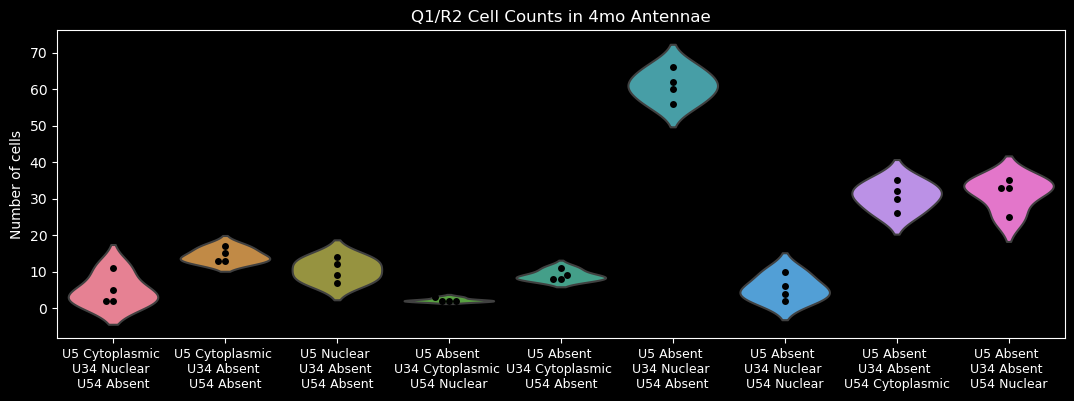

In [12]:
# Plot the data using seaborn as violin with swarmplot
plt.figure(figsize=(13, 4))
colors = ['cyan', 'magenta']
# Violin plot with large white points inside
sns.violinplot(data=data, inner=None, linewidth=1.5, palette=sns.color_palette("husl", 9)) 
sns.swarmplot(data=data, color='black', size=5) 
# use cols_to_names to rename the xticks
plt.xticks(range(9), [cols_to_names[col] for col in data.columns], rotation=0, fontsize=9)
plt.ylabel("Number of cells")
plt.title("Q1/R2 Cell Counts in 4mo Antennae")
plt.show()

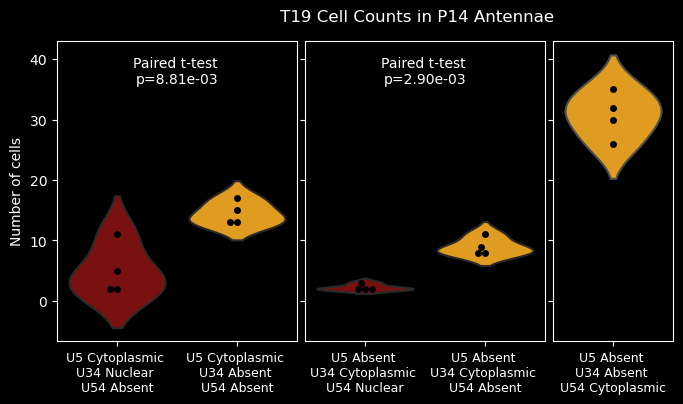

In [14]:
# Plot cols 0 and 1 together and 3 and 4 together 
f, ax = plt.subplots(1, 3, figsize=(8, 4), sharey=True)
# Make the first two subplots large and the last one small
ax[0].set_position([0.05, 0.15, 0.3, 0.75])
ax[1].set_position([0.36, 0.15, 0.3, 0.75])
ax[2].set_position([0.67, 0.15, 0.15, 0.75])
colors = ['darkred', 'orange']

indices = [0, 1]
sns.violinplot(data=data.iloc[:, indices], inner=None, linewidth=1.5, palette=colors, ax=ax[0])
sns.swarmplot(data=data.iloc[:, indices], color='black', size=5, ax=ax[0])
ax[0].set_xticks(range(2))
ax[0].set_xticklabels([cols_to_names[col] for col in data.columns[indices]], rotation=0, fontsize=9)
ax[0].set_ylabel("Number of cells")
t, p = stats.ttest_rel(data.iloc[:, indices[0]], data.iloc[:, indices[1]])
ax[0].text(0.5, 0.9, f"Paired t-test \np={p:.2e}", ha='center', va='center', transform=ax[0].transAxes)

indices = [3, 4]
sns.violinplot(data=data.iloc[:, indices], inner=None, linewidth=1.5, palette=colors, ax=ax[1])
sns.swarmplot(data=data.iloc[:, indices], color='black', size=5, ax=ax[1])
ax[1].set_xticks(range(2))
ax[1].set_xticklabels([cols_to_names[col] for col in data.columns[indices]], rotation=0, fontsize=9)
t, p = stats.ttest_rel(data.iloc[:, indices[0]], data.iloc[:, indices[1]])
ax[1].text(0.5, 0.9, f"Paired t-test \np={p:.2e}", ha='center', va='center', transform=ax[1].transAxes)

indices = [7]
sns.violinplot(data=data.iloc[:, indices], inner=None, linewidth=1.5, palette=['orange'], ax=ax[2])
sns.swarmplot(data=data.iloc[:, indices], color='black', size=5, ax=ax[2])
ax[2].set_xticks(range(1))
ax[2].set_xticklabels([cols_to_names[col] for col in data.columns[indices]], rotation=0, fontsize=9)

plt.suptitle("T19 Cell Counts in P14 Antennae")
plt.show()

In [32]:
data

,546C-488N-647A,546C-488A-647A,546N-488A-647A,546A-488C-647N,546A-488C-647A,546A-488N-647A,546A-488N-647N,546A-488A-647C,546A-488A-647N
0,11,17,7,2,11,56,10,35,33
1,2,13,12,2,8,60,4,32,33
2,5,13,14,2,8,62,6,26,35
3,2,15,9,3,9,66,2,30,25


Text(0.5, 1.0, 'T19 Coexpression in P14 Antennae')

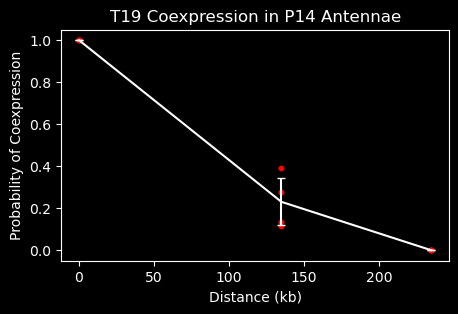

In [79]:
# Convert to distances 
u5_dist = 0 # kb 
u5_u34_dist = 135 # kb 
u5_u54_dist = 235 # kb 

# get data 
u5_alone = data['546C-488A-647A'].values
u5_total = data['546C-488N-647A'].values + data['546C-488A-647A'].values 
u5_34 = data['546C-488N-647A'].values

# Convert to probabilities 
u5_34 = u5_34 / u5_total
u5_total = np.ones_like(u5_34)
u5_54 = np.zeros_like(u5_34)

distances = np.stack([u5_dist*np.ones_like(u5_total), u5_u34_dist*np.ones_like(u5_34), u5_u54_dist*np.ones_like(u5_54)])
probabilities = np.stack([u5_total, u5_34, u5_54])

# Plot probabilities vs distances
plt.figure(figsize=(5, 3))
plt.scatter(distances, probabilities, color='red', s=10)
plt.errorbar(distances.mean(axis=1), probabilities.mean(axis=1), yerr=probabilities.std(axis=1), color='white', capsize=3)
plt.xlabel("Distance (kb)")
plt.ylabel("Probability of Coexpression")
plt.title("T19 Coexpression in P14 Antennae")


## L3 & Lnc1, P14

Counters: 
- 546C-647N (cytoplasmic magenta & nuclear cyan)
- 546C-647A (cytoplasmic magenta & absent cyan)

In [164]:
input_path = os.path.join(main_dir, '2024-12-17-18', 'D1.1 P14 Antenna Lnc1-B3-647 L3-B1-546 DAPI') 

# Load XML cell counting files 
xml_files = [f for f in os.listdir(input_path) if f.endswith('.xml')]

# load data 
data = []
for file in xml_files:
    file_path = os.path.join(input_path, file)
    marker_counts = count_markers_in_xml(file_path)
    data.append(marker_counts)

# Create a DataFrame from the data
data = pd.DataFrame(data)
data

,546C-647N,546C-647A
0,14,3
1,22,1
2,30,3
3,20,3
4,17,2
5,13,1


In [165]:
# Make a column with col 1 divided by sum of cols 1 and 2
data['percent_coexpressing'] = data['546C-647N'] / (data['546C-647N'] + data['546C-647A'])

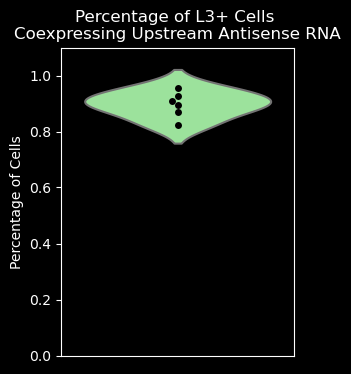

In [169]:
# Plot the data using seaborn as violin with swarmplot
plt.figure(figsize=(3, 4))
sns.violinplot(data=data['percent_coexpressing'], inner=None, linewidth=1.5, palette=['lightgreen']) 
sns.swarmplot(data=data['percent_coexpressing'], color='black', size=5) 
plt.ylabel("Percentage of Cells")
plt.title("Percentage of L3+ Cells \nCoexpressing Upstream Antisense RNA")
plt.xticks([])
plt.ylim(0, 1.1)
plt.show()